In [1]:
import os
from glob import glob
from xorca.lib import load_xorca_dataset
import xgcm
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
from cmocean import cm
from matplotlib import colors
import cartopy.crs as ccrs
os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/shkifmjr/cartopy_images/'
from mpl_toolkits.axes_grid1 import make_axes_locatable

import warnings
warnings.simplefilter('ignore')
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

### Define path to data

In [2]:
meshdir = "/scratch/usr/shklvn09/NUDATA/ORION/10-data/meshmask/"
meshfile_mask = "mesh_mask.nc"
mask = xr.open_dataset(meshdir + meshfile_mask)

mask = mask.rename({'z':'deptht'}) ## Rename dimension z to deptht to multiply different variables with same dimensions

In [3]:
path_map = '/scratch/usr/shkifmmp/postproc_ORION10/velocities/yearly/mops/polynya/maps_yearchunks/'
img = plt.imread('/home/shkifmjr/cartopy_images/BlueMarble_TOPO_010_FEB.png')

In [4]:
# setting data to each year chunk, mld separately because it's for september only (not yearly mean). Otherwise it creates data with 2 number in time_counter

m_output_58 = sorted(glob(path_map + '*1y*_1958_1968.nc'))
m_output_69 = sorted(glob(path_map + '*1y*_1969_1974.nc'))
m_output_75 = sorted(glob(path_map + '*1y*_1975_1979.nc'))
m_output_80 = sorted(glob(path_map + '*1y*_1980_1983.nc'))

mld_out = sorted(glob(path_map + '*09*somxl010*.nc'))

In [5]:
map_58, map_69, map_75, map_80  = (xr.open_mfdataset(m_output_58,combine='by_coords'), 
                                   xr.open_mfdataset(m_output_69,combine='by_coords'),
                                   xr.open_mfdataset(m_output_75,combine='by_coords'),
                                   xr.open_mfdataset(m_output_80,combine='by_coords')
                                  )
mld  = xr.open_mfdataset(mld_out,combine='by_coords')

In [ ]:
mld

#### Maps of CO2

In [6]:
co2_58, co2_69,  co2_75, co2_80 = (map_58.co2flux.squeeze(), 
                                   map_69.co2flux.squeeze(),
                                   map_75.co2flux.squeeze(),
                                   map_80.co2flux.squeeze()
                                  )

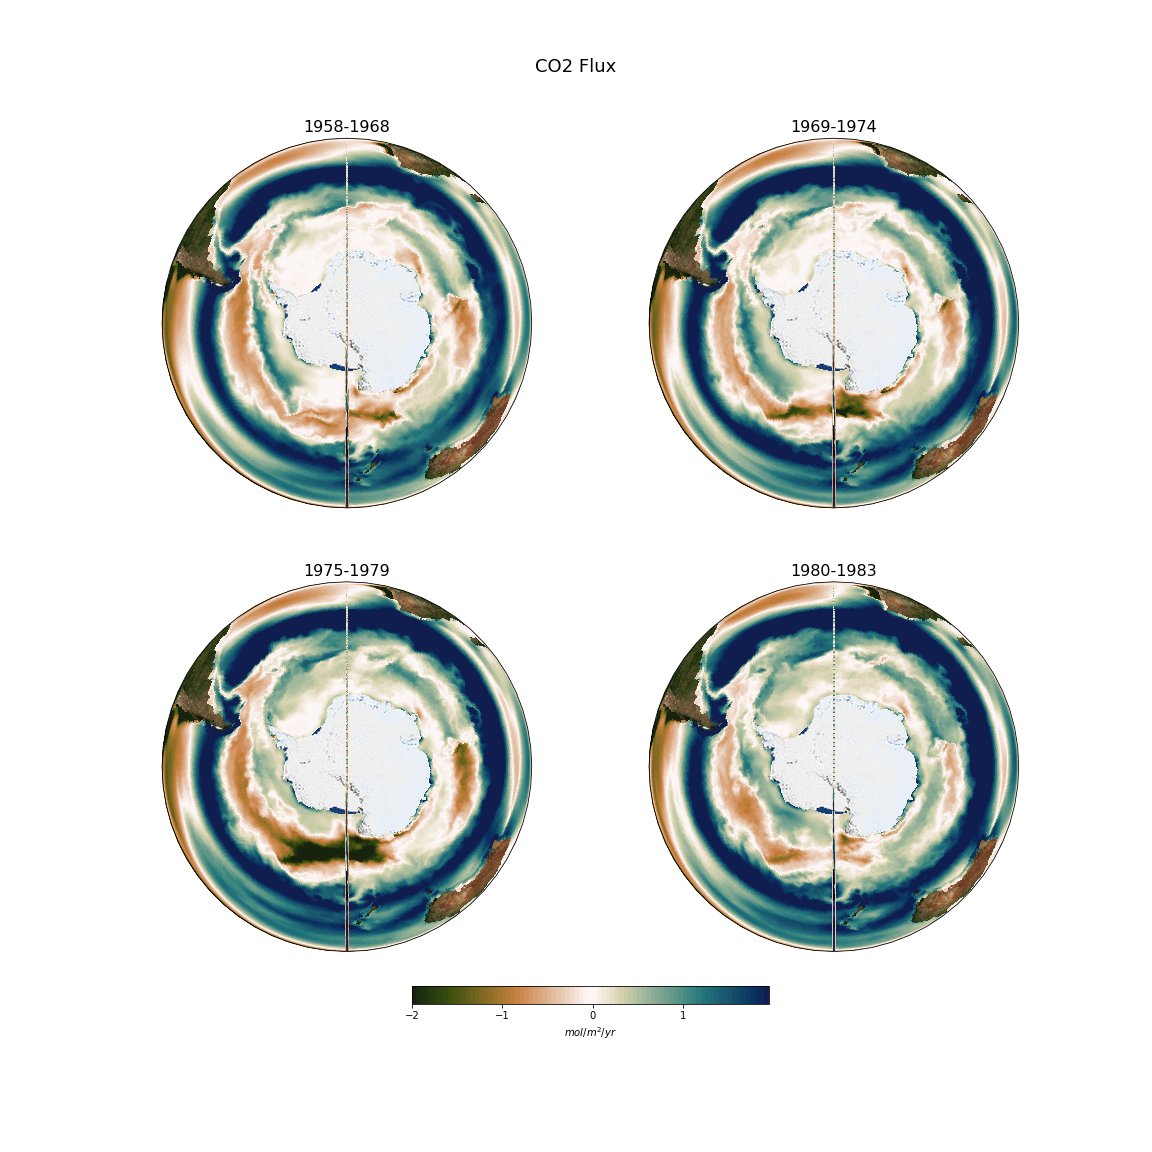

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,16), subplot_kw={'projection': ccrs.NearsidePerspective(central_latitude=-90)}, facecolor="none")

levs = np.hstack((np.arange(-2, 2, 0.05)))
norm = colors.BoundaryNorm(boundaries=levs, ncolors=256) 

plt.suptitle('CO2 Flux', fontsize=18, y=0.95)

axs[0,0].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)
map1 = axs[0,0].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], co2_58.where(mask.tmask.isel(deptht=0).squeeze() == 1),
                      vmax = 2, vmin = -2,
                      cmap=cm.tarn, transform=ccrs.PlateCarree(), norm  = norm)
axs[0,0].set_title('1958-1968', fontsize= 16)


axs[0,1].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)
map2 = axs[0,1].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], co2_69.where(mask.tmask.isel(deptht=0).squeeze() == 1),
                    vmax = 2, vmin = -2,
                     cmap=cm.tarn, transform=ccrs.PlateCarree(), norm  = norm)
axs[0,1].set_title('1969-1974', fontsize= 16)

axs[1,0].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)
map3 = axs[1,0].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], co2_75.where(mask.tmask.isel(deptht=0).squeeze() == 1),
                      vmax = 2, vmin = -2,
                      cmap=cm.tarn, transform=ccrs.PlateCarree(), norm  = norm)
axs[1,0].set_title('1975-1979', fontsize= 16)

axs[1,1].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)

map4 = axs[1,1].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], co2_80.where(mask.tmask.isel(deptht=0).squeeze() == 1),
                      vmax = 2, vmin = -2,
                      cmap=cm.tarn, transform=ccrs.PlateCarree(), norm  = norm)
axs[1,1].set_title('1980-1983', fontsize= 16)


c = plt.colorbar(map4, ax=axs[:,:], fraction=0.025, pad = 0.04, shrink = 0.4, orientation= 'horizontal')
c.ax.set_xlabel('$mol/m^2/yr$')
c.set_ticks([-2, -1 , 0, 1, 2])

plt.tight_layout()

#When you save, the image gets weird in the notebook, but it's saved normally in the computer
#savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/'
#plt.savefig(savepath + 'surface_map_co2_ychunks.png', format='png', facecolor="w") #setting facecolor=white to countor bug when saving, can also use pdf

### Maps of SST

In [33]:
sst_58, sst_69,  sst_75, sst_80 = (map_58.sosstsst.squeeze(), 
                                   map_69.sosstsst.squeeze(),
                                   map_75.sosstsst.squeeze(),
                                   map_80.sosstsst.squeeze()
                                  )

In [79]:
sst_69.where(mask.tmask.isel(deptht=0).squeeze() == 1).min().values

array(-1.8802085, dtype=float32)

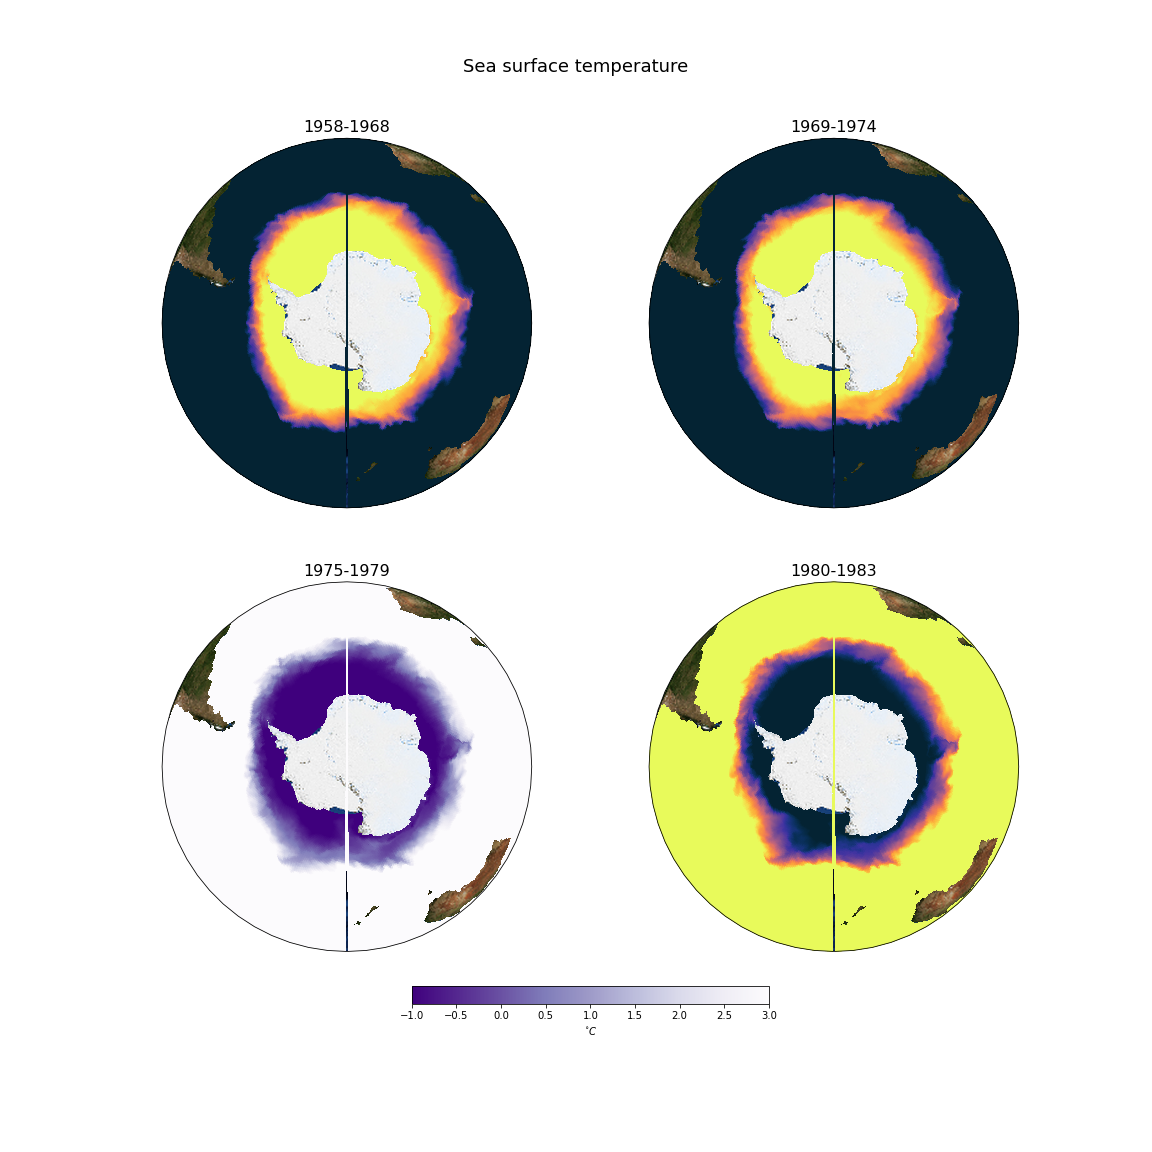

In [69]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,16), subplot_kw={'projection': ccrs.NearsidePerspective(central_latitude=-90)}, facecolor="none")

#levs = np.hstack((np.arange(-1, 5, 0.1)))
#norm = colors.BoundaryNorm(boundaries=levs, ncolors=256) 

tmin= -1
tmax= 3
plt.suptitle('Sea surface temperature', fontsize=18, y=0.95)

axs[0,0].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)
map1 = axs[0,0].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], sst_58.where(mask.tmask.isel(deptht=0).squeeze() == 1),
                      vmax = tmax, vmin = tmin,
                      cmap=cm.thermal_r, transform=ccrs.PlateCarree())#, norm  = norm)
axs[0,0].set_title('1958-1968', fontsize= 16)


axs[0,1].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)
map2 = axs[0,1].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], sst_69.where(mask.tmask.isel(deptht=0).squeeze() == 1),
                    vmax = tmax, vmin = tmin,
                     cmap=cm.thermal_r, transform=ccrs.PlateCarree())#, norm  = norm)
axs[0,1].set_title('1969-1974', fontsize= 16)

axs[1,0].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)
map3 = axs[1,0].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], sst_75.where(mask.tmask.isel(deptht=0).squeeze() == 1),
                      vmax = tmax, vmin = tmin,
                      cmap='Purples_r', transform=ccrs.PlateCarree())#, norm  = norm)
axs[1,0].set_title('1975-1979', fontsize= 16)

axs[1,1].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)

map4 = axs[1,1].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], sst_80.where(mask.tmask.isel(deptht=0).squeeze() == 1),
                      vmax = tmax, vmin = tmin,
                      cmap=cm.thermal, transform=ccrs.PlateCarree())#, norm  = norm)
axs[1,1].set_title('1980-1983', fontsize= 16)


c = plt.colorbar(map3, ax=axs[:,:], fraction=0.025, pad = 0.04, shrink = 0.4, orientation= 'horizontal')
c.ax.set_xlabel('$^{\circ} C$')
#c.set_ticks([-1, 0, 1, 2, 3])

plt.tight_layout()


### Maps of SSS

In [7]:
sss_58, sss_69,  sss_75, sss_80 = (map_58.sosaline.squeeze(), 
                                   map_69.sosaline.squeeze(),
                                   map_75.sosaline.squeeze(),
                                   map_80.sosaline.squeeze()
                                  )

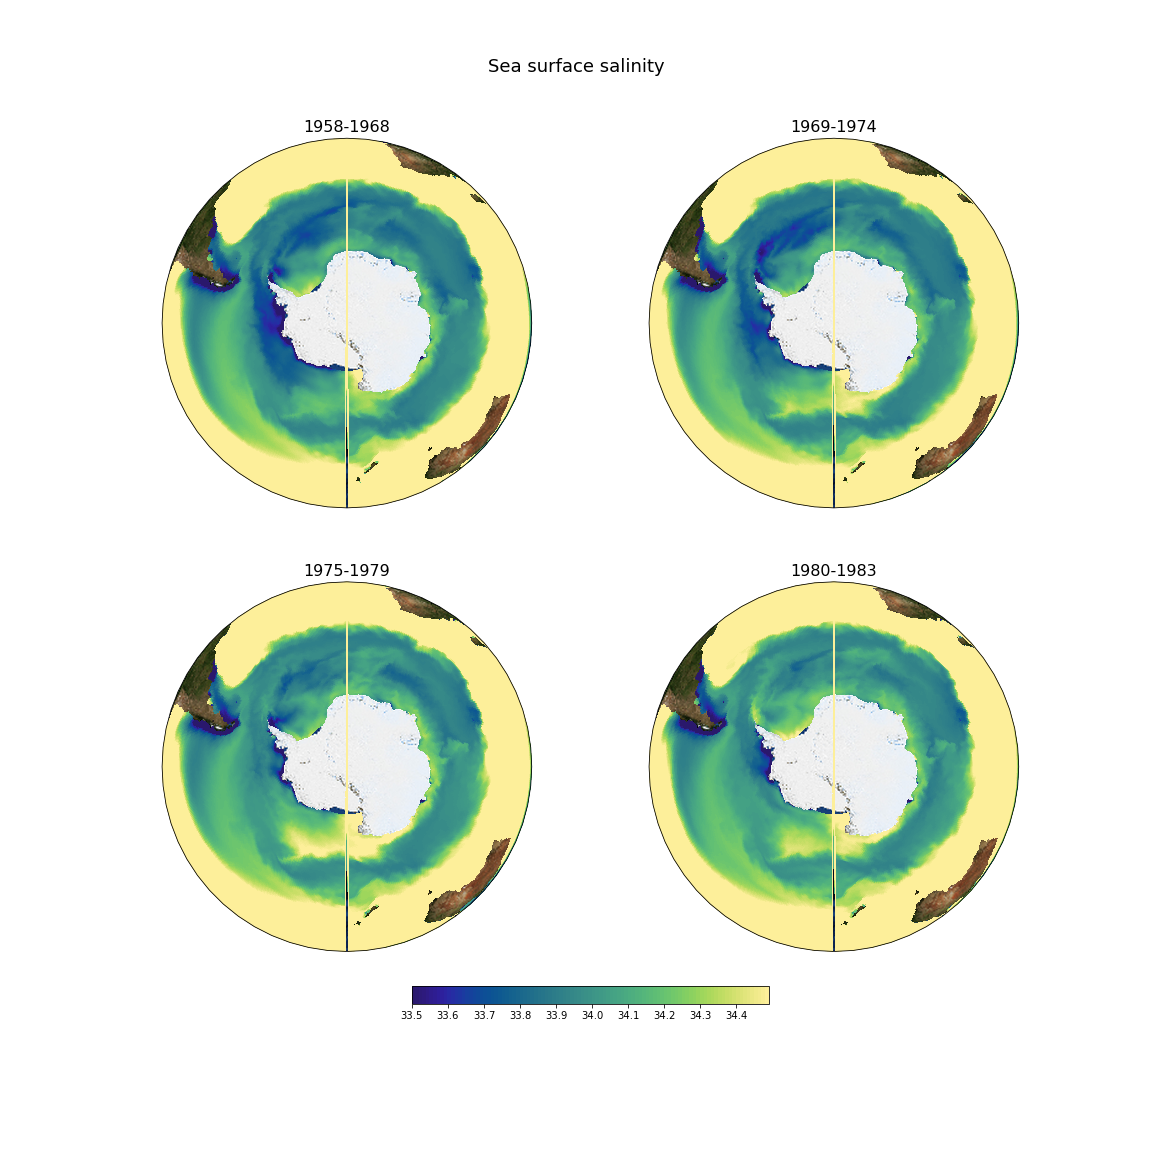

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,16), subplot_kw={'projection': ccrs.NearsidePerspective(central_latitude=-90)}, facecolor="none")

levs = np.hstack((np.arange(33.5, 34.5, 0.01)))
norm = colors.BoundaryNorm(boundaries=levs, ncolors=256) 

plt.suptitle('Sea surface salinity', fontsize=18, y=0.95)

smax = 34.5
smin = 33.5

axs[0,0].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)
map1 = axs[0,0].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], sss_58.where(mask.tmask.isel(deptht=0).squeeze() == 1),
                      vmax = smax, vmin = smin,
                      cmap=cm.haline, transform=ccrs.PlateCarree(), norm  = norm)
axs[0,0].set_title('1958-1968', fontsize= 16)


axs[0,1].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)
map2 = axs[0,1].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], sss_69.where(mask.tmask.isel(deptht=0).squeeze() == 1),
                   vmax = smax, vmin = smin,
                     cmap=cm.haline, transform=ccrs.PlateCarree(), norm  = norm)
axs[0,1].set_title('1969-1974', fontsize= 16)

axs[1,0].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)
map3 = axs[1,0].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], sss_75.where(mask.tmask.isel(deptht=0).squeeze() == 1),
                    vmax = smax, vmin = smin,
                      cmap=cm.haline, transform=ccrs.PlateCarree(), norm  = norm)
axs[1,0].set_title('1975-1979', fontsize= 16)

axs[1,1].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)

map4 = axs[1,1].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], sss_80.where(mask.tmask.isel(deptht=0).squeeze() == 1),
                    vmax = smax, vmin = smin,
                      cmap=cm.haline, transform=ccrs.PlateCarree(), norm  = norm)
axs[1,1].set_title('1980-1983', fontsize= 16)


c = plt.colorbar(map1, ax=axs[:,:], fraction=0.025, pad = 0.04, shrink = 0.4, orientation= 'horizontal')
#c.ax.set_xlabel('$mol/m^2/yr$')
#c.set_ticks([-1, 0, 1, 2, 3])

plt.tight_layout()
savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/'
plt.savefig(savepath + 'surface_map_sss_ychunks.png', format='png', facecolor="w", pdi=300) #setting facecolor=white to countor bug when saving, can also use pdf

### maps of MLD

In [ ]:
mld.somxl010.isel(time_counter=0).where(mask.tmask.isel(deptht=0).squeeze() == 1)

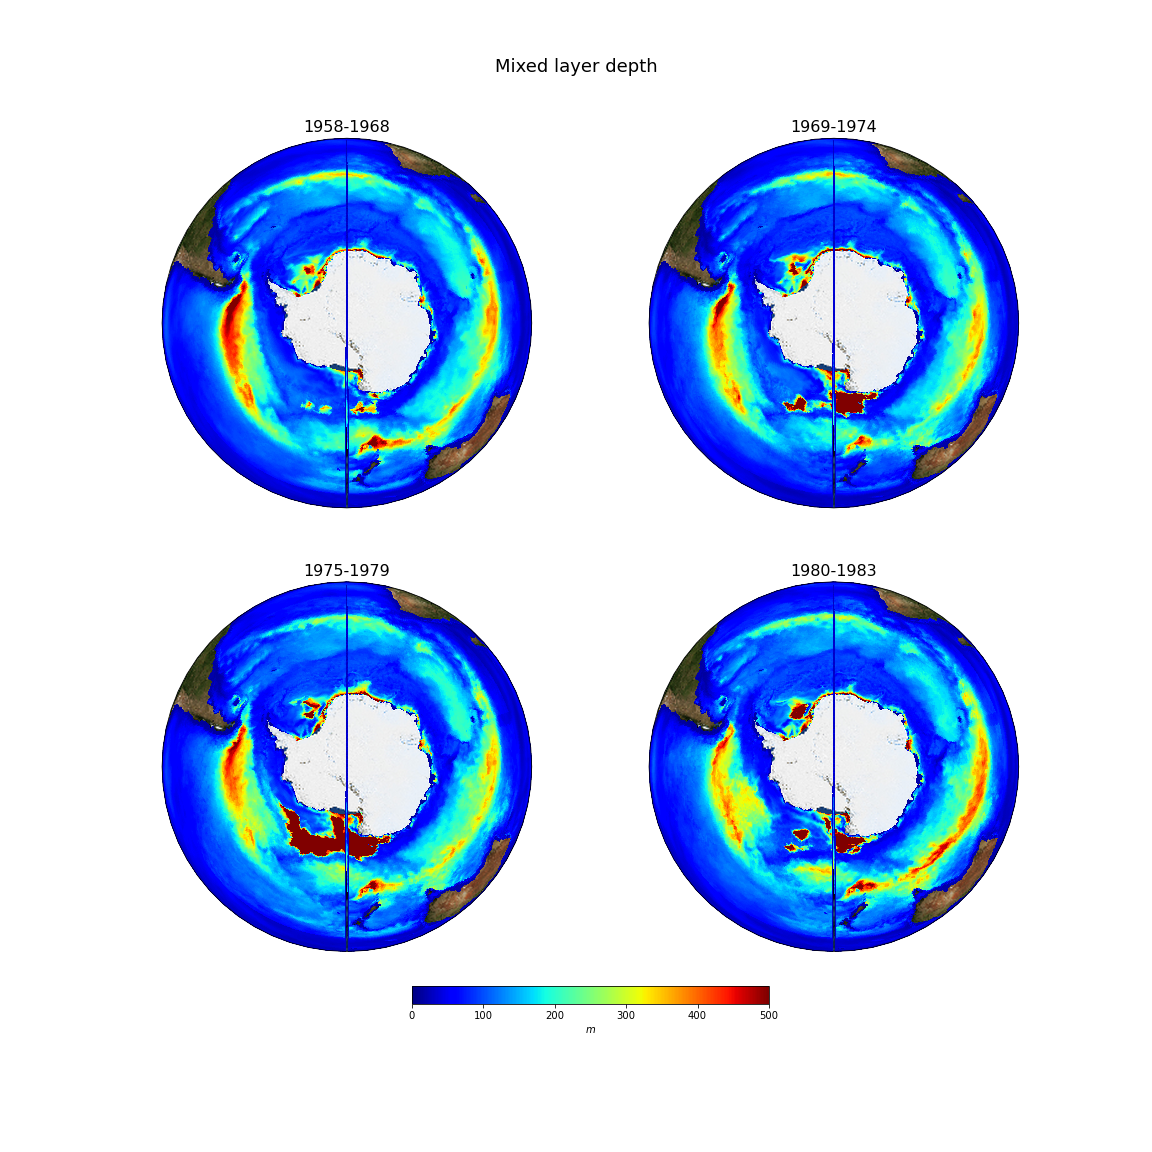

In [56]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,16), subplot_kw={'projection': ccrs.NearsidePerspective(central_latitude=-90)}, facecolor="none")

#levs = np.hstack((np.arange(0, 34.5, 1)))
#norm = colors.BoundaryNorm(boundaries=levs, ncolors=256) 

plt.suptitle('Mixed layer depth', fontsize=18, y=0.95)

mmax = 500
mmin = 0

axs[0,0].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)
map1 = axs[0,0].pcolormesh(mld['nav_lon'], mld['nav_lat'], mld.somxl010.isel(time_counter=0).where(mask.tmask.isel(deptht=0).squeeze() == 1),
                      vmax = mmax, vmin = mmin,
                      cmap='jet', transform=ccrs.PlateCarree())#, norm  = norm)
axs[0,0].set_title('1958-1968', fontsize= 16)


axs[0,1].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)
map2 = axs[0,1].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], mld.somxl010.isel(time_counter=1).where(mask.tmask.isel(deptht=0).squeeze() == 1),
                   vmax = mmax, vmin = mmin,
                     cmap='jet', transform=ccrs.PlateCarree())#, norm  = norm)
axs[0,1].set_title('1969-1974', fontsize= 16)

axs[1,0].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)
map3 = axs[1,0].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], mld.somxl010.isel(time_counter=2).where(mask.tmask.isel(deptht=0).squeeze() == 1),
                    vmax = mmax, vmin = mmin,
                      cmap='jet', transform=ccrs.PlateCarree())#, norm  = norm)
axs[1,0].set_title('1975-1979', fontsize= 16)

axs[1,1].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=300)

map4 = axs[1,1].pcolormesh(map_58['nav_lon'], map_58['nav_lat'], mld.somxl010.isel(time_counter=3).where(mask.tmask.isel(deptht=0).squeeze() == 1),
                    vmax = mmax, vmin = mmin,
                      cmap='jet', transform=ccrs.PlateCarree())#, norm  = norm)
axs[1,1].set_title('1980-1983', fontsize= 16)


c = plt.colorbar(map1, ax=axs[:,:], fraction=0.025, pad = 0.04, shrink = 0.4, orientation= 'horizontal')
c.ax.set_xlabel('$m$')
#c.set_ticks([-1, 0, 1, 2, 3])

plt.tight_layout()
savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/'
plt.savefig(savepath + 'surface_map_mld_ychunks.png', format='png', facecolor="w", pdi=300) #setting facecolor=white to countor bug when saving, can also use pdf
